In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
! pip install scikit-optimize
# report scikit-optimize version number
import skopt
print('skopt %s' % skopt.__version__)
from skopt.space import Integer
from sklearn.feature_selection import SequentialFeatureSelector


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.9/738.9 kB 49.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
skopt 0.10.1


In [ ]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [ ]:
data1.shape

(50005, 18)

In [ ]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [ ]:
data1.shape

(50000, 18)

## What to do with Tempo column

In [ ]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


## Label encoding variables in data 1

In [ ]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [ ]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "key", "mode", "tempo", "obtained_date", "music_genre", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

# KNN Classifier Data 1 Baseline

In [ ]:
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(data1[features], data1["music_genre"], test_size=0.2, random_state=1)
neigh1b = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1b))))
neigh1b.fit(X_train1b, y_train1b)
knn_test_pred1b = neigh1b.predict(X_test1b)
test_acc1b = accuracy_score(y_test1b, knn_test_pred1b)
print("Accuracy (test):", test_acc1b)
print("Accuracy (train):", accuracy_score(y_train1b, neigh1b.predict(X_train1b)))

Accuracy (test): 0.1858
Accuracy (train): 0.20555


In [ ]:
#normalize feature data 1
#norm_feat = preprocessing.normalize(data1[features])
scaler = preprocessing.MinMaxScaler()
scaled_feat = scaler.fit_transform(data1[features])

#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_feat, data1["music_genre"], test_size=0.2, random_state=1)

In [ ]:
np.sqrt(len(data1))

223.60679774997897

# KNN Classifier for data 1

In [ ]:
data1.head(10)

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
5,5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
6,6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,5
7,7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,5
8,8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8,1,5
9,9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,5


In [ ]:
#N = sqrt(N)
neigh = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1))))
neigh.fit(X_train1, y_train1)
knn_test_pred1 = neigh.predict(X_test1)
test_acc1 = accuracy_score(y_test1, knn_test_pred1)
print("Accuracy (test):", test_acc1)
print("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))


Accuracy (test): 0.4082
Accuracy (train): 0.4287


In [ ]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric 
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')
data1_2 = data1.dropna()

In [ ]:
data1_2[["tempo", "music_genre_num"]].corr()

,tempo,music_genre_num
tempo,1.000000,-0.022762
music_genre_num,-0.022762,1.000000


# KNN Data 1 (attempt 2) - feature selection

In [ ]:
knn1_2 = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train1))))
sfs1_2 = SequentialFeatureSelector(knn1_2, n_features_to_select='auto')
sfs1_2.fit(X_train1, y_train1)
sfs1_2.get_feature_names_out

selectedfeat1_2 = sfs1_2.get_support()

features1_2 = [features[i] for i in range(len(features)) if selectedfeat1_2[i]]

scaler1_2 = preprocessing.MinMaxScaler()
scaled_feat1_2 = scaler1_2.fit_transform(data1[features1_2])

#train test split
X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(scaled_feat1_2, data1["music_genre"], test_size=0.2, random_state=1)

neigh1_2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1_2))))
neigh1_2.fit(X_train1_2, y_train1_2)
knn_test_pred1_2 = neigh1_2.predict(X_test1_2)
test_acc1_2 = accuracy_score(y_test1_2, knn_test_pred1_2)
print("Accuracy (test):", test_acc1_2)
print("Accuracy (train):", accuracy_score(y_train1_2, neigh1_2.predict(X_train1_2)))

Accuracy (test): 0.4936
Accuracy (train): 0.5071


In [ ]:
features1_2

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'valence',
 'key_D#',
 'key_F#',
 'key_G#']

# KNN Data 1 (attempt 3)- k-fold Cross Validation + Grid Search

Grid search takes too long because it goes through so many options.

In [ ]:
"""knn1_3 = KNeighborsClassifier()

param_grid1_3 = {'n_neighbors': np.arange(1, int(len(X_train1_2)*0.1), 1)}

knn_gscv1_3 = GridSearchCV(knn1_3, param_grid1_3, cv = 3)

knn_gscv1_3.fit(X_train1_2, y_train1_2)"""


"knn1_3 = KNeighborsClassifier()\n\nparam_grid1_3 = {'n_neighbors': np.arange(1, int(len(X_train1_2)*0.1), 1)}\n\nknn_gscv1_3 = GridSearchCV(knn1_3, param_grid1_3, cv = 3)\n\nknn_gscv1_3.fit(X_train1_2, y_train1_2)"

In [ ]:
"""plt.plot(np.arange(1, int(len(X_train1_2)*0.1)), knn_gscv1_3.cv_results_["mean_test_score"])
plt.title("Mean Test Score by n_neighbor (GridSearch Data 1)")"""

'plt.plot(np.arange(1, int(len(X_train1_2)*0.1)), knn_gscv1_3.cv_results_["mean_test_score"])\nplt.title("Mean Test Score by n_neighbor (GridSearch Data 1)")'

In [ ]:
"""#n_neighbors value with highest accuracy
knn_gscv1_3.best_params_"""

'#n_neighbors value with highest accuracy\nknn_gscv1_3.best_params_'

In [ ]:
"""neigh1_3_2 = KNeighborsClassifier(n_neighbors=knn_gscv1_3.best_params_)
neigh1_3_2.fit(X_train1_2, y_train1_2)
knn_test_pred1_3_2 = neigh1_3_2.predict(X_test1_2)
test_acc1_3_2 = accuracy_score(y_test1_2, knn_test_pred1_3_2)
print("Accuracy (test):", test_acc1_3_2)
print("Accuracy (train):", accuracy_score(y_train1_2, neigh1_3_2.predict(X_train1_2)))"""


'neigh1_3_2 = KNeighborsClassifier(n_neighbors=knn_gscv1_3.best_params_)\nneigh1_3_2.fit(X_train1_2, y_train1_2)\nknn_test_pred1_3_2 = neigh1_3_2.predict(X_test1_2)\ntest_acc1_3_2 = accuracy_score(y_test1_2, knn_test_pred1_3_2)\nprint("Accuracy (test):", test_acc1_3_2)\nprint("Accuracy (train):", accuracy_score(y_train1_2, neigh1_3_2.predict(X_train1_2)))'

# KNN Data 1 (attempt 4)- k-fold Cross Validation + Bayesian Search

In [ ]:
bayes_search1_4 = skopt.BayesSearchCV(KNeighborsClassifier(), {"n_neighbors": Integer(1, int(len(X_train1_2)*0.1))}, random_state = 1, return_train_score=True)
bayes_search1_4.fit(X_train1_2, y_train1_2)
bp1_4 = bayes_search1_4.best_params_["n_neighbors"]

neigh1_4_2 = KNeighborsClassifier(n_neighbors=bp1_4)
neigh1_4_2.fit(X_train1_2, y_train1_2)
knn_test_pred1_4_2 = neigh1_4_2.predict(X_test1_2)
test_acc1_4_2 = accuracy_score(y_test1_2, knn_test_pred1_4_2)
print("Accuracy (test):", test_acc1_4_2)
print("Accuracy (train):", accuracy_score(y_train1_2, neigh1_4_2.predict(X_train1_2)))


Accuracy (test): 0.5059
Accuracy (train): 0.5236


In [ ]:
print("best parameter:", bp1_4)


best parameter: 102


Text(0, 0.5, 'Test Score Accuracy')

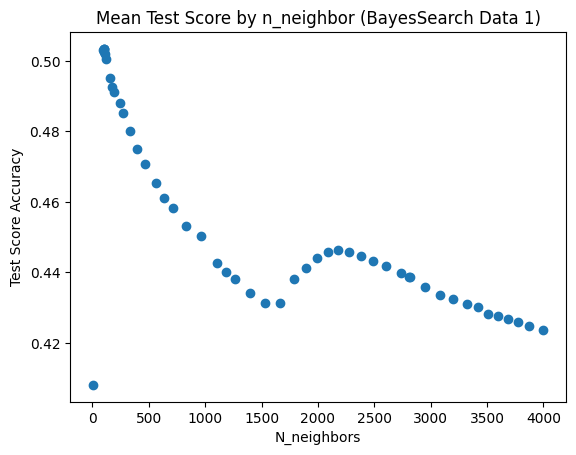

In [ ]:
plt.scatter([x["n_neighbors"] for x in bayes_search1_4.cv_results_["params"]], bayes_search1_4.cv_results_['mean_test_score'])
plt.title("Mean Test Score by n_neighbor (BayesSearch Data 1)")
plt.xlabel("N_neighbors")
plt.ylabel("Test Score Accuracy")

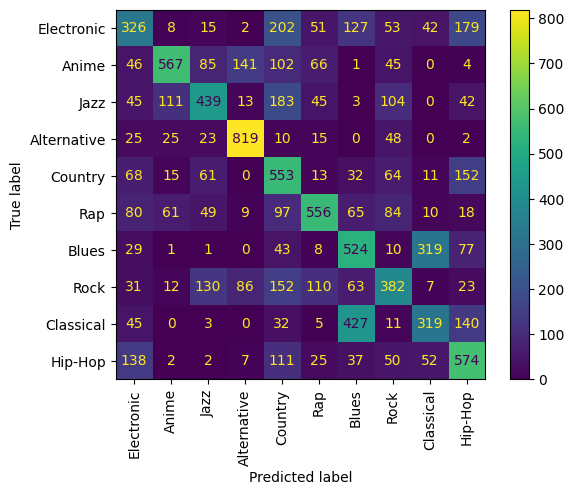

In [ ]:
cm1 = confusion_matrix(y_test1_2, knn_test_pred1_4_2)
ax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())
ax1.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
"""
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train1, y_train1)
knn_test_pred1 = neigh.predict(X_test1)
test_acc1 = accuracy_score(y_test1, knn_test_pred1)
print("Accuracy (test):", test_acc1)
print("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))


cm1 = confusion_matrix(y_test1, knn_test_pred1)
ax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())
ax1.plot()
plt.xticks(rotation=90)
plt.show()"""

'\nneigh = KNeighborsClassifier(n_neighbors=20)\nneigh.fit(X_train1, y_train1)\nknn_test_pred1 = neigh.predict(X_test1)\ntest_acc1 = accuracy_score(y_test1, knn_test_pred1)\nprint("Accuracy (test):", test_acc1)\nprint("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))\n\n\ncm1 = confusion_matrix(y_test1, knn_test_pred1)\nax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())\nax1.plot()\nplt.xticks(rotation=90)\nplt.show()'

In [ ]:
print(classification_report(y_test_data1, y_pred_data1))

# Data 2

In [ ]:
#drop all the rows that are null
data2 = data2.dropna()

## Label encoding variables in data 2

In [ ]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [ ]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

# KNN Classifier Data 2 Baseline

In [ ]:
X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(data2[features2], data2["track_genre"], test_size=0.2, random_state=1)
neigh2b = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2b))))
neigh2b.fit(X_train2b, y_train2b)
knn_test_pred2b = neigh2b.predict(X_test2b)
test_acc2b = accuracy_score(y_test2b, knn_test_pred2b)
print("Accuracy (test):", test_acc2b)
print("Accuracy (train):", accuracy_score(y_train2b, neigh2b.predict(X_train2b)))

Accuracy (test): 0.038157894736842106
Accuracy (train): 0.05007730347920482


In [ ]:
int(np.sqrt(len(X_train2b)))

301

In [ ]:
#normalize feature data 2
#norm_feat2 = preprocessing.normalize(data2[features2])
scaler2 = preprocessing.MinMaxScaler()
scaled_feat2 = scaler2.fit_transform(data2[features2])

#train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_feat2, data2["track_genre"], test_size=0.2, random_state=1)

# KNN Classifier for data 2

In [ ]:

neigh2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2))))
neigh2.fit(X_train2, y_train2)
knn_test_pred2 = neigh2.predict(X_test2)
test_acc2 = accuracy_score(y_test2, knn_test_pred2)
print("Accuracy (test):", test_acc2)
print("Accuracy (train):", accuracy_score(y_train2, neigh2.predict(X_train2)))

"""cm2 = confusion_matrix(y_test2, knn_test_pred2)
ax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())
ax2.plot()
plt.xticks(rotation=90)
plt.show()"""

Accuracy (test): 0.1693421052631579
Accuracy (train): 0.18491430827092403


'cm2 = confusion_matrix(y_test2, knn_test_pred2)\nax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())\nax2.plot()\nplt.xticks(rotation=90)\nplt.show()'

In [ ]:
int(np.sqrt(len(X_train2)))

301

# KNN Data 2 (attempt 2) feature selection

In [ ]:
knn2_2 = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train2))))
sfs2_2 = SequentialFeatureSelector(knn2_2)
sfs2_2.fit(X_train2, y_train2)
sfs2_2.get_feature_names_out

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
selectedfeat2_2 = sfs2_2.get_support()

In [ ]:
#selectedfeat2_2 = np.array([True, False,  True, False, False,  True, False,  True,  True, True, False, False,  True, False])

In [ ]:
features2

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
features2_2 = [features2[i] for i in range(len(features2)) if selectedfeat2_2[i]]
features2_2

['popularity',
 'danceability',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'tempo']

In [ ]:
[x for x in features2 if x not in features2_2]

['duration_ms',
 'energy',
 'key',
 'mode',
 'liveness',
 'valence',
 'time_signature']

In [ ]:
scaler2_2 = preprocessing.MinMaxScaler()
scaled_feat2_2 = scaler2_2.fit_transform(data2[features2_2])

#train test split
X_train2_2, X_test2_2, y_train2_2, y_test2_2 = train_test_split(scaled_feat2_2, data2["track_genre"], test_size=0.2, random_state=1)

neigh2_2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2_2))))
neigh2_2.fit(X_train2_2, y_train2_2)
knn_test_pred2_2 = neigh2_2.predict(X_test2_2)
test_acc2_2 = accuracy_score(y_test2_2, knn_test_pred2_2)
print("Accuracy (test):", test_acc2_2)
print("Accuracy (train):", accuracy_score(y_train2_2, neigh2_2.predict(X_train2_2)))

Accuracy (test): 0.20096491228070176
Accuracy (train): 0.21164705753352558


# KNN Data 2 (attempt 3) Grid Search

In [ ]:
"""knn2_3 = KNeighborsClassifier()

param_grid2_3 = {'n_neighbors': np.arange(1, int(len(X_train2_2)*0.1), 1)}

knn_gscv2_3 = GridSearchCV(knn2_3, param_grid2_3, cv = 3)

knn_gscv2_3.fit(X_train2_2, y_train2_2)"""


"knn2_3 = KNeighborsClassifier()\n\nparam_grid2_3 = {'n_neighbors': np.arange(1, int(len(X_train2_2)*0.1), 1)}\n\nknn_gscv2_3 = GridSearchCV(knn2_3, param_grid2_3, cv = 3)\n\nknn_gscv2_3.fit(X_train2_2, y_train2_2)"

In [ ]:
"""plt.plot(np.arange(1, int(len(X_train2_2)*0.1)), knn_gscv2_3.cv_results_["mean_test_score"])
plt.title("Mean Test Score by n_neighbor (GridSearch Data 2)")"""

'plt.plot(np.arange(1, int(len(X_train2_2)*0.1)), knn_gscv2_3.cv_results_["mean_test_score"])\nplt.title("Mean Test Score by n_neighbor (GridSearch Data 2)")'

In [ ]:
"""#n_neighbors value with highest accuracy
knn_gscv2_3.best_params_"""

'#n_neighbors value with highest accuracy\nknn_gscv2_3.best_params_'

In [ ]:
"""neigh2_3_2 = KNeighborsClassifier(n_neighbors=knn_gscv2_3.best_params_)
neigh2_3_2.fit(X_train2_2, y_train2_2)
knn_test_pred2_3_2 = neigh2_3_2.predict(X_test2_2)
test_acc2_3_2 = accuracy_score(y_test2_2, knn_test_pred2_3_2)
print("Accuracy (test):", test_acc2_3_2)
print("Accuracy (train):", accuracy_score(y_train2_2, neigh2_3_2.predict(X_train2_2)))"""

'neigh2_3_2 = KNeighborsClassifier(n_neighbors=knn_gscv2_3.best_params_)\nneigh2_3_2.fit(X_train2_2, y_train2_2)\nknn_test_pred2_3_2 = neigh2_3_2.predict(X_test2_2)\ntest_acc2_3_2 = accuracy_score(y_test2_2, knn_test_pred2_3_2)\nprint("Accuracy (test):", test_acc2_3_2)\nprint("Accuracy (train):", accuracy_score(y_train2_2, neigh2_3_2.predict(X_train2_2)))'

# KNN Data 2 (attempt 4) Bayes Search

In [ ]:
bayes_search2_4 = skopt.BayesSearchCV(KNeighborsClassifier(), {"n_neighbors": Integer(1, int(len(X_train2_2)*0.01))}, random_state = 1)
bayes_search2_4.fit(X_train2_2, y_train2_2)
bp2_4 = bayes_search2_4.best_params_["n_neighbors"]

neigh2_4_2 = KNeighborsClassifier(n_neighbors=bp2_4)
neigh2_4_2.fit(X_train2_2, y_train2_2)
knn_test_pred2_4_2 = neigh2_4_2.predict(X_test2_2)
test_acc2_4_2 = accuracy_score(y_test2_2, knn_test_pred2_4_2)
print("Accuracy (test):", test_acc2_4_2)
print("Accuracy (train):", accuracy_score(y_train2_2, neigh2_4_2.predict(X_train2_2)))


Accuracy (test): 0.22833333333333333
Accuracy (train): 0.2803758813144881


In [ ]:
print("best parameter:", bp2_4)

best parameter: 36


Text(0, 0.5, 'Test Score Accuracy')

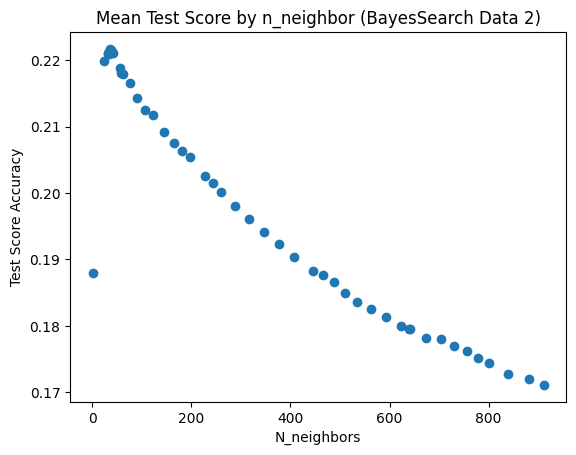

In [ ]:
plt.scatter([x["n_neighbors"] for x in bayes_search2_4.cv_results_["params"]], bayes_search2_4.cv_results_['mean_test_score'])
plt.title("Mean Test Score by n_neighbor (BayesSearch Data 2)")
plt.xlabel("N_neighbors")
plt.ylabel("Test Score Accuracy")

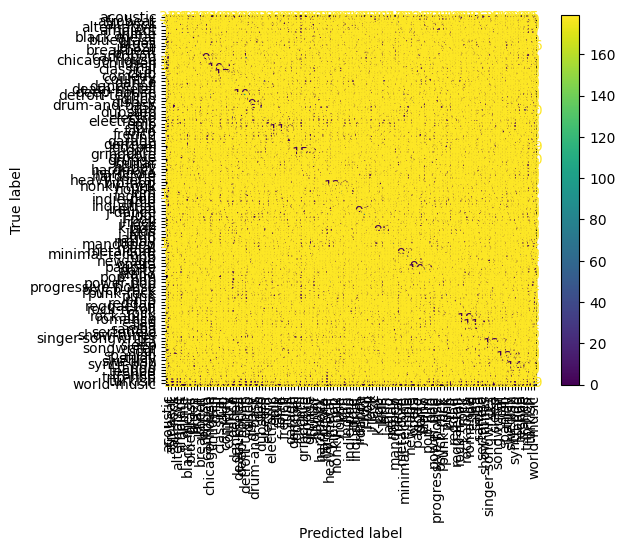

In [ ]:
cm2 = confusion_matrix(y_test2_2, knn_test_pred2_4_2)
ax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())
ax2.plot()
plt.xticks(rotation=90)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>